# Table of Contents
* [Approach](#Approach)
	* [Methods for characteristic functions](#Methods-for-characteristic-functions)
		* [CECM](#CECM)
		* [Generalized correlation CF](#Generalized-correlation-CF)
		* [Multiscale](#Multiscale)
* [Tests](#Tests)
	* [Artificial data](#Artificial-data)
	* [Comparison](#Comparison)
	* [Dataset](#Dataset)
		* [Earthquake selection](#Earthquake-selection)
* [Exports](#Exports)


# Approach

Invert the source parameters that explainned the observed caracterisitic function. 
- The first step is to estimate each sample probability of being the result of ambient seismic noise, or of a body-wave arrival.
    - **CECM** (Nagano 1989) & Sta Lta (Allen 1982) : high correlation coefficients are obtained with isotropic noise
    - The detection threshold value is dynamic (function of the mean and standard deviation, Baer & Kradolfer 1987).
    - Multiband processing based on multiscale approach (Lomax et al. 2012)
>To be tested
> - Set a dynamic detection threshold based on **Kurtosis** (Saragiotis et al., 2002 ; Ross and Ben-Zion, 2014)
> - SNI : high correlation coefficients are obtained with diffuse noise
> - Auto-correlation peak width ($ \propto \frac{1}{w} $)

- The seconde step is to perform an inversion of the caracteristic functions of find the parameter of the corresponding events.
>To be tested
> - follow the **NonLinLoc** inversion procedure for continous CFs
> - migration of CFs 
> - **back projection** of CFs
> - ... and with differential CFs

The triggering algorithms are can be integrated in the class hierarchy of table below

**Table 1**: a class hierarchy for triggering algorithms

pre-processor|multiplexor|processor|post-processor
-:|:-:|:-:|-
RMS|LT-ST|ratio|derivation
Average|RW-LW|correlation|Kurtosis
|component||
**attribute**|**method**|**class**|**class**

## Methods for characteristic functions

We aim to propose a method to characterise the probability of arrivals 
- for volumic waves, 
- independant form frequency range,
- with minimun parameterization.

### CECM

The component energy correlation method is based on the correlation of the RMS time series of the 3d components of ground displacements. A multi-scaling approach is used to be sensitive to all kinds of seismicity.

### Generalized correlation CF

Compared to the ratio operator (use in STA/LTA and RW/LW methods) and to the derivation operator, the correlation operator has two advantages:
- it is finite (it ranges between 0 and 1),
- it is ... (it can be enhanced with product operator and still range between 0 and 1).

These two advantages allow two things:
- the quantitative assessment of threshold,
- the quantitative comparison of multiple properties even different in nature.

How about using the correlation in place of the ratio and derivate operators? The ratio operator in frenquncy is actually an approximation of the correlation, in time. Using a correlation operator, would be a more reliable paradigm. The correlations of the time evolutions $f$ and $g$ of two statistical properties is actually a approximation the deconvolution of the same two signals: 

\begin{align}
\mathcal{F}\{f * g\}& = k \cdot \mathcal{F}\{f\} \cdot \mathcal{F}\{g\} &
\text{and } \mathcal{F}\{f * g^*(-)\} =& k\cdot \dfrac{ \mathcal{F}\{f\} }{ \mathcal{F}\{g\} } \\
\text{then } \mathcal{F}\{f\star g\}& = \mathcal{F}\{f\} \cdot (\mathcal{F}\{g\})^* &
=& k\cdot \dfrac{ \mathcal{F}\{f\} \cdot \mathcal{F}\{g^*(-)\} }{ |\mathcal{F}\{g\}| } 
\end{align}

where $\mathcal{F}$ denotes the Fourier transform, and an $^{\ast}$ indicates the complex conjugate.  Coupled with fast Fourier transform algorithms, this property is often exploited for the efficient numerical computation of cross-correlations (see Circular convolution theorem and cross-correlation theorem).

### Multiscale

Allow to get rid of params

# Tests

## Artificial data

Assume a obspy.Stream with 0) noise (trace Ns) 1) two amplitudes changes simulating P and S wave trains (trace A) 2) two frequency changes (trace F) 3) two polarity changes (trace P)

<IPython.core.display.Javascript object>


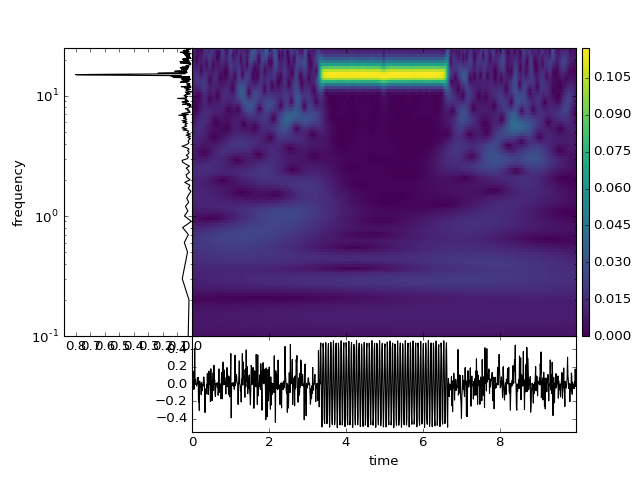

In [1]:
%matplotlib notebook
import sys 
import matplotlib.pyplot as plt
from obspy.signal.tf_misfit import plot_tfr
from imp import reload
sys.path.append("/Users/fmassin/Google Drive/Projects/NaiNo-Kami/Py/obspy/obspy/signal/")
import trigger2 as trigger#tseries, wrapper, 
reload(trigger)

npts=1000
a = trigger.artificial_stream(npts=npts)
plot_tfr((a[1]).data, dt=.01, fmin=0.1, fmax=25)

<IPython.core.display.Javascript object>


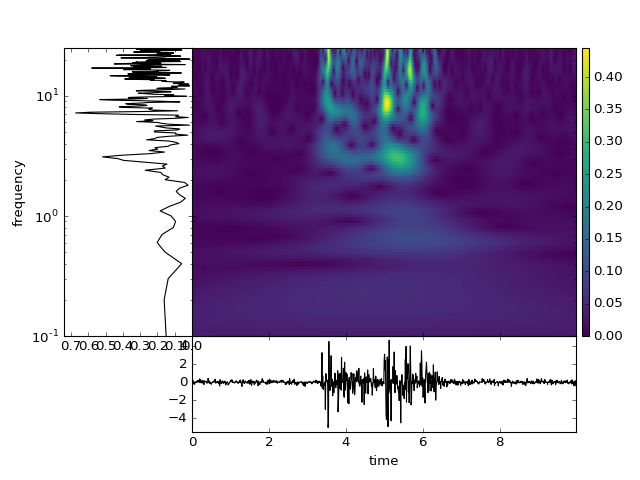

In [16]:
plot_tfr((a[2]).data, dt=.01, fmin=0.1, fmax=25)

<IPython.core.display.Javascript object>


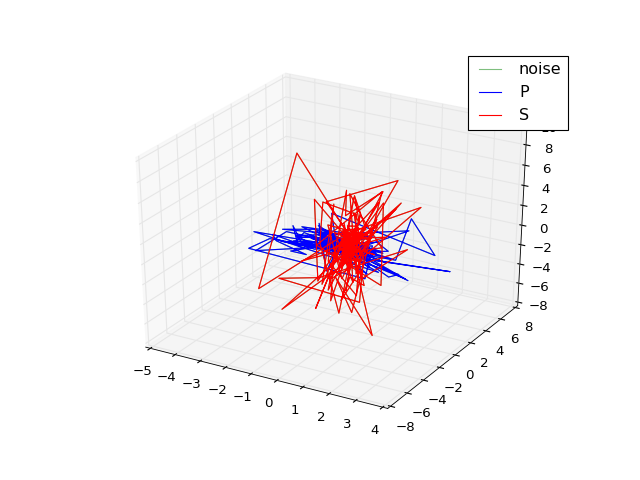

/Users/fmassin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/fmassin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(a[5].data, a[6].data, a[7].data, label='noise', alpha=.5, color='g')
ax.plot(a[5].data[npts/3:npts/2],a[6].data[npts/3:npts/2],a[7].data[npts/3:npts/2], label='P', color='b')
ax.plot(a[5].data[npts/2:npts*2/3],a[6].data[npts/2:npts*2/3],a[7].data[npts/2:npts*2/3], label='S', color='r')
ax.legend()
plt.show()

## Comparison

$\star c_{rms}$ can be compared to $ \bar{st}$/$\bar{lt} $ and $\bar{st}\star\bar{lt}$ ...

<IPython.core.display.Javascript object>


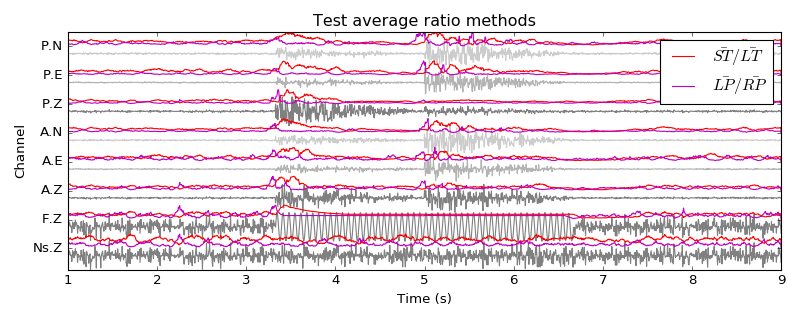

<IPython.core.display.Javascript object>


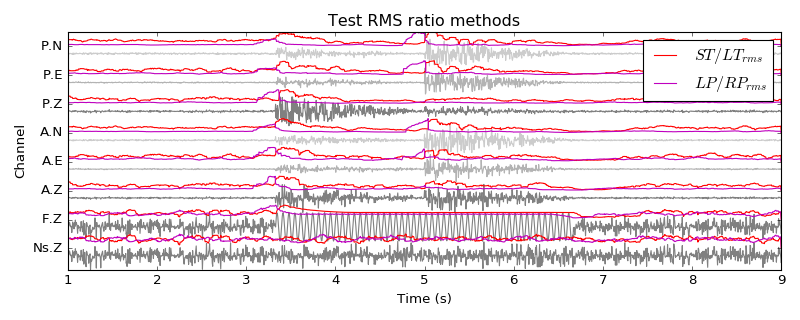

<IPython.core.display.Javascript object>


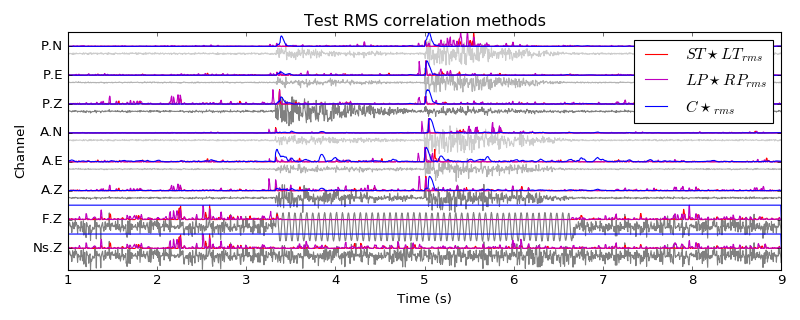

<IPython.core.display.Javascript object>


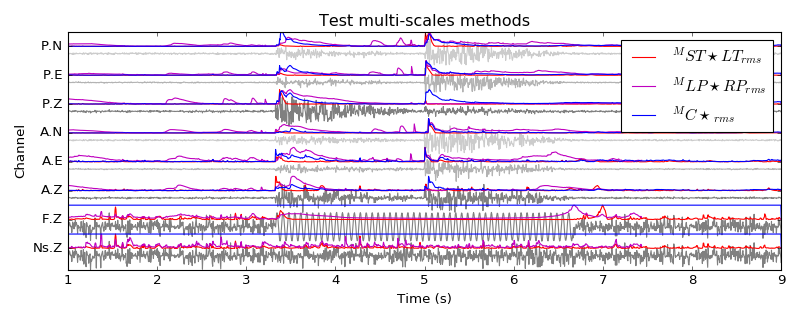

/Users/fmassin/Google Drive/Projects/NaiNo-Kami/Py/obspy/obspy/signal/trigger2.py:405: RuntimeWarning: invalid value encountered in less
  a_squarecumsum[a_squarecumsum < dtiny] = dtiny
/Users/fmassin/Google Drive/Projects/NaiNo-Kami/Py/obspy/obspy/signal/trigger2.py:1294: RuntimeWarning: invalid value encountered in less
  buf[buf < dtiny] = dtiny
/Users/fmassin/Google Drive/Projects/NaiNo-Kami/Py/obspy/obspy/signal/trigger2.py:1304: RuntimeWarning: invalid value encountered in less
  cf[ cf< dtiny ] = dtiny
/Users/fmassin/Google Drive/Projects/NaiNo-Kami/Py/obspy/obspy/signal/trigger2.py:1190: RuntimeWarning: invalid value encountered in less
  buf[buf < dtiny] = dtiny


In [19]:
###
reload(trigger)
a = trigger.artificial_stream(npts=2000)

ax0 = (plt.figure( figsize=(10, 4) )).gca()
ax1 = (plt.figure( figsize=(10, 4) )).gca()
ax2 = (plt.figure( figsize=(10, 4) )).gca()
ax3 = (plt.figure( figsize=(10, 4) )).gca()

#fig = plt.figure( figsize=(10, 15) ) #plt.figure(figsize=plt.figaspect(.8))
#ax0 = plt.subplot2grid((4, 1), (0, 0))
#ax1 = plt.subplot2grid((4, 1), (1, 0))
#ax2 = plt.subplot2grid((4, 1), (2, 0))
#ax3 = plt.subplot2grid((4, 1), (3, 0))
#fig.subplots_adjust(hspace=0.) 


rtlt  = trigger.Correlate(data=a, multiplexor='ltrt', preprocessor='rms')#, scales=[3, 30])
stlt  = trigger.Correlate(data=a, multiplexor='stlt', preprocessor='rms')#, scales=[3, 30])
cecm = trigger.Correlate(data=a, multiplexor='comp', preprocessor='rms')#, scales=[32])
stlt.plot(ax=ax3, cfcolor='r', label=r'$^MST\star LT_{rms}$')
rtlt.plot(ax=ax3, cfcolor='m', label=r'$^MLP\star RP_{rms}$', f="nodata")
cecm.plot(ax=ax3, cfcolor='b', label=r'$^MC\star_{rms}$', f="nodata")


rtlt = trigger.Correlate(data=a, multiplexor='ltrt', preprocessor='rms', scales=[15])
stlt = trigger.Correlate(data=a, multiplexor='stlt', preprocessor='rms', scales=[20, 160])
cecm = trigger.Correlate(data=a, multiplexor='comp', preprocessor='rms', scales=[64])
stlt.plot(ax=ax2, cfcolor='r', label=r'$ST\star LT_{rms}$')
rtlt.plot(ax=ax2, cfcolor='m', label=r'$LP\star RP_{rms}$', f="nodata")
cecm.plot(ax=ax2, cfcolor='b', label=r'$C\star_{rms}$', f="nodata")

rtlt = trigger.Ratio(data=a, multiplexor='ltrt', preprocessor='rms', scales=[50])
stlt = trigger.Ratio(data=a, multiplexor='stlt', preprocessor='rms', scales=[20, 160])
stlt.plot(ax=ax1, cfcolor='r', label=r'$ST/LT_{rms}$')
rtlt.plot(ax=ax1, cfcolor='m', label=r'$LP/RP_{rms}$', f="nodata")

rtlt = trigger.Ratio(data=a, multiplexor='ltrt', preprocessor='averageabs', scales=[20])
stlt = trigger.Ratio(data=a, multiplexor='stlt', preprocessor='averageabs', scales=[20, 160])
stlt.plot(ax=ax0, cfcolor='r', label=r'$\bar{ST}/\bar{LT}$')
rtlt.plot(ax=ax0, cfcolor='m', label=r'$\bar{LP}/\bar{RP}$', f="nodata")

ax0.set_title('Test average ratio methods')
ax1.set_title('Test RMS ratio methods')
ax2.set_title('Test RMS correlation methods')
ax3.set_title('Test multi-scales methods')

ax0.set_xlim(1,9)
(ax0.get_figure()).tight_layout()
ax1.set_xlim(1,9)
(ax1.get_figure()).tight_layout()
ax2.set_xlim(1,9)
(ax2.get_figure()).tight_layout()
ax3.set_xlim(1,9)
(ax3.get_figure()).tight_layout()

## Dataset

We need a waveform dataset for developpement.

All earthquake records are indexed in a catalog (a flat file).
In a first attempt, we select earthquake records randomly in the catalog, by filtering only vertical components. We then get the corresponding horizontal records.
A better selection (respecting the G-R law, with a large distance range) can be obtained by adapting the catalog where earthquakes record are indexed.

### Earthquake selection

Linear grid along distances and magnitudes for now...

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from  obspy.clients.filesystem.sds import Client
from  obspy.core.utcdatetime import UTCDateTime

import sys 
sys.path.append("/Users/massin/Documents/Projects/NaiNo-Kami/Py/NnK/NnK/")
import trigger
reload(trigger)

client = Client("/Users/massin/Documents/Data/ANT/sds/")  
catalog = "/Users/massin/Documents/Data/ANT/Inventory/arrivals-hybrid.Id-Net-Sta-Type-W_aprio-To-D-Az-Inc-hh-mm-t_obs-tt_obs-tt_calc-t_calc-res-W_apost-F_peak-F_median-A_max-A_unit-Id-Ot-Md-Lat-Lon-Dep-Ex-Ey-Ez-RMS-N_P-N_S-D_min-Gap-Ap-score_S-score_M"

names=('Networks','Stations','Waves', 'weights','Origin time', 'Distances','Hours', 'Minuts', 'Seconds', 'Magnitudes')
columns=(1, 2, 3, 4, 5, 6, 9, 10, 11, 23)
metadata = np.genfromtxt(catalog, usecols=columns, comments="Id", names=names, dtype=None)

OSError: SDS root is not a local directory: /Users/massin/Documents/Data/ANT/sds/

In [9]:
import wrapper
reload(wrapper)

M_range = np.linspace(1,   4, 16)
D_range = np.linspace(0,  50, 16) 
T_range = ['N','S','P','E']

indexmat = wrapper.rand2mat(client, D_range, M_range, T_range, metadata, ntarget = 50000, snr = 2.5)    

/usr/local/opt/anaconda2/lib/python2.7/site-packages/obspy/core/stream.py:2855: UserWarning: Incompatible traces (sampling_rate, dtype, ...) with same id detected. Doing nothing.
  warnings.warn(msg)


N breaking


<IPython.core.display.Javascript object>


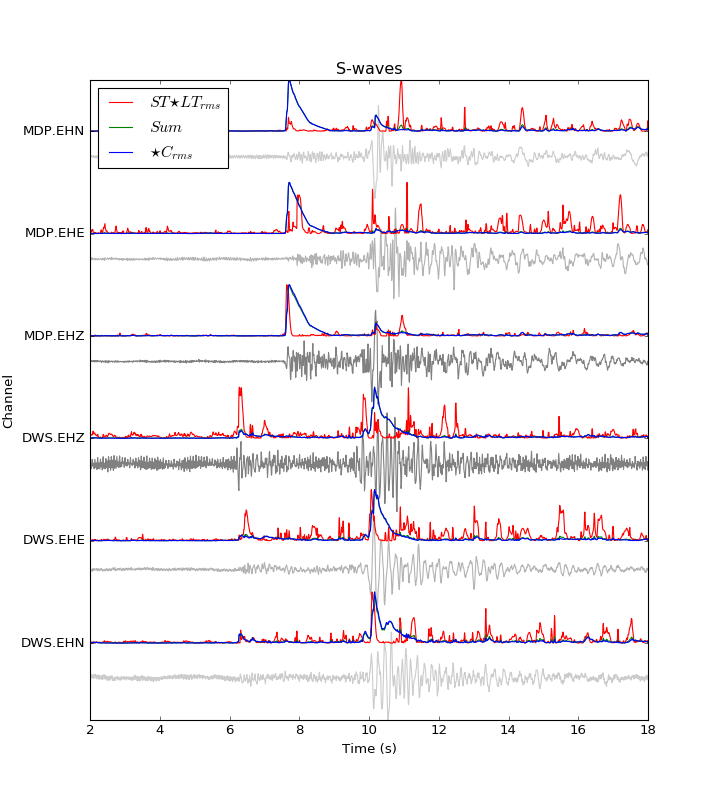

<IPython.core.display.Javascript object>


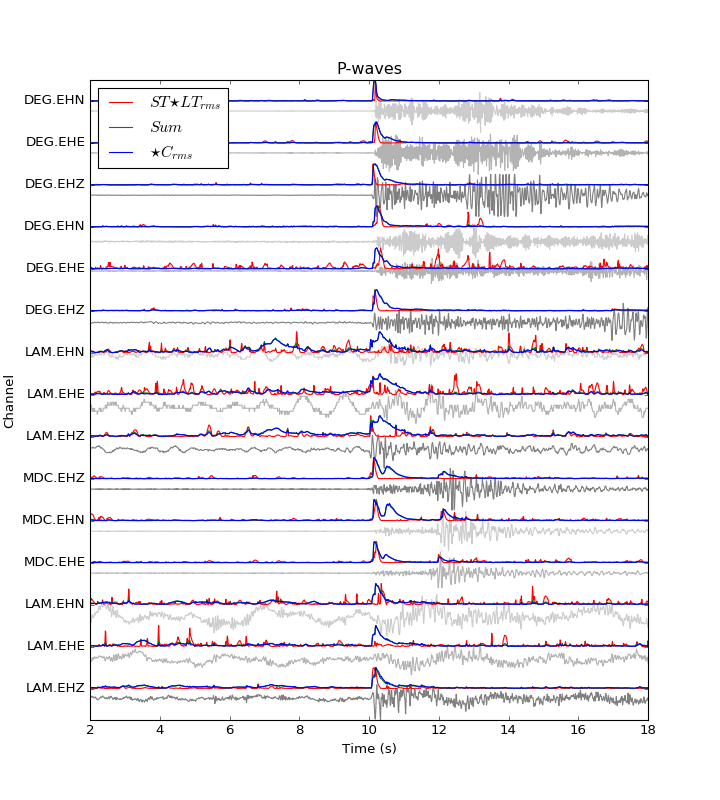

<IPython.core.display.Javascript object>


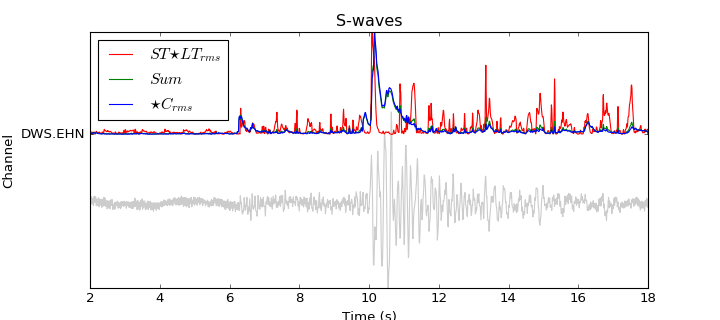

<IPython.core.display.Javascript object>


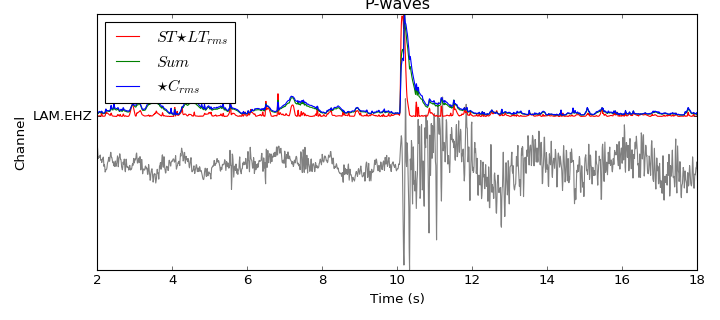

In [10]:
reload(trigger)

RGBA_NSPE = indexmat.copy()

exag=1.
t=1
shift=[0,0,0,0]
#ax_prime = (plt.figure( figsize=(9, 10) )).gca()
#ax_prime.set_title(r'$${\star}C_{rms}.ST{\star}LT_{rms}$')
ax = [ (plt.figure( figsize=(9, 10) )).gca(),  (plt.figure( figsize=(9, 10) )).gca(), (plt.figure( figsize=(9, 4) )).gca(),  (plt.figure( figsize=(9, 4) )).gca() ]

from obspy import Stream

for d, dist in enumerate(D_range) :
    for m, mag in enumerate(M_range) :
        for t, type in enumerate(T_range) :
            if np.sum(shift)>20.:
                break
            arrival = int(indexmat[d,m,t])
            if arrival > 0.:
                
                time = UTCDateTime(str(metadata[arrival][4]))  
                time += (metadata[arrival][6]-time.hour)*60*60 + \
                    (metadata[arrival][7]-time.minute)*60 + \
                    (metadata[arrival][8]-(time.second+time.microsecond/1000000.))

                st = client.get_waveforms(metadata[arrival][0], metadata[arrival][1], "*", "*[ENZ]", time-10, time+10)
                st.trim(time-10, time+10) 

                #rtlt_a = trigger.Correlate(data=st, multiplexor='ltrt',preprocessor='rms')
                stlt_a = trigger.Correlate(data=st, multiplexor='stlt',preprocessor='rms')#, scales=[3, 30])
                comp_rms = trigger.Correlate(data=st, multiplexor='comp',preprocessor='rms')#, scales=[32]) 
                #rtlt_a_corr = rtlt_a.output()
                stlt_a_corr = stlt_a.output()
                comp_e_corr = comp_rms.output()                      
                cf = (comp_e_corr + stlt_a_corr)
                
                ############  abs's mean, delta's mean, abs's max, delta's max 
                statitics = [0., 0., 0., 0.]
                noisestatitics = [0., 0., 0., 0.]
                datastatitics = [0., 0., 0., 0.]
                lenmeasurement = 40
                after  = np.arange(len(cf[0])/2,len(cf[0])/2+lenmeasurement,1)
                before = np.arange(len(cf[0])/2-lenmeasurement,len(cf[0])/2,1)
                maxnoise = 0.
                for i, f in enumerate(cf):   
                    if len(f) > after[-1] and len((st[i]).data.copy())> after[-1]:
                        #
                        if np.max(f[:500]) > maxnoise :
                            maxnoise = np.max(f[:500])
                        if np.max(f[-500:]) > maxnoise :
                            maxnoise = np.max(f[-500:])
                        #
                        df = np.abs(f[1:]-f[:-1])
                        af  = (np.max(f[after])   -np.max(f[before]))
                        adf = (np.max(df[after-1])-np.max(df[before-1]))
                        ##
                        statitics[0] +=  af/len(cf)
                        statitics[1] += adf/len(cf)  
                        ##
                        if af > statitics[2] :
                            statitics[2] = af                    
                        if adf > statitics[3] :
                            statitics[3] = adf
                        #
                        af = np.max(f[before])
                        adf = np.max(df[before-1])
                        ##
                        noisestatitics[0] +=  af/len(cf)
                        noisestatitics[1] += adf/len(cf)
                        ##
                        if af > noisestatitics[2] :
                            noisestatitics[2] = af                  
                        if adf > noisestatitics[3] :
                            noisestatitics[3] = adf
                        #
                        f = np.abs((st[i]).data.copy())
                        df = np.abs(f[1:]-f[:-1])
                        ##
                        datastatitics[0] += (np.max( f[after])  /np.max( f[before]))   /len(cf)
                        datastatitics[1] += (np.max(df[after-1])/np.max(df[before-1]))/len(cf)
                        datastatitics[2] += (np.max( f[after])  -np.max( f[before]))   /len(cf)
                        datastatitics[3] += (np.max(df[after-1])-np.max(df[before-1]))/len(cf)
                
                istat = 2
                RGBA_NSPE[d,m,t] = statitics[istat] # the wave at selected distance and magnitude
                RGBA_NSPE[d,m,3] = datastatitics[0] # the error at selected distance and magnitude
                if RGBA_NSPE[d,m,0] > noisestatitics[istat] or RGBA_NSPE[d,m,0] ==0  :
                    RGBA_NSPE[d,m,0] = noisestatitics[istat] # the corresponding noise    
                
                if shift[2+t-1]<1 and maxnoise <= 0.2 and statitics[0]>2*noisestatitics[0] and metadata[arrival][9]>2. and metadata[arrival][9]<3.  :
                    
                    newstream = Stream()
                    newstream.append(st[0])
                    
                    trigger.stream_processor_plot(newstream, stlt_a_corr, ax=ax[2+t-1], cfcolor='r', label=r'$ST{\star}LT_{rms}$', shift=shift[2+t-1], f="nodata")
                    trigger.stream_processor_plot(newstream, cf, ax=ax[2+t-1], cfcolor='g', label=r'$Sum$', shift=shift[2+t-1])
                    trash, shift[2+t-1] = trigger.stream_processor_plot(newstream, comp_e_corr, ax=ax[2+t-1], cfcolor='b', label=r'${\star}C_{rms}$', shift=shift[2+t-1], f="nodata")

                if shift[t-1]<20 and maxnoise <= 0.2 and statitics[0]>2*noisestatitics[0] and metadata[arrival][9]>2. and metadata[arrival][9]<3.  :
                    
                    stlt_a.plot(ax=ax[t-1], cfcolor='r', label=r'$ST{\star}LT_{rms}$', shift=shift[t-1], f="nodata")
                    trigger.stream_processor_plot(st, cf, ax=ax[t-1], cfcolor='g', label=r'$Sum$', shift=shift[t-1])
                    trash, shift[t-1] = comp_rms.plot(ax=ax[t-1], cfcolor='b', label=r'${\star}C_{rms}$', shift=shift[t-1], f="nodata")
                

legend = (ax[0]).legend(loc=2)
legend = (ax[1]).legend(loc=2)
legend = (ax[2]).legend(loc=2)
legend = (ax[3]).legend(loc=2)
(ax[0]).set_xlim(2,18)
(ax[1]).set_xlim(2,18)
(ax[2]).set_xlim(2,18)
(ax[3]).set_xlim(2,18)
(ax[0]).set_title('S-waves')
(ax[1]).set_title('P-waves')
(ax[2]).set_title('S-waves')
(ax[3]).set_title('P-waves')

In [12]:
import wrapper
reload(wrapper)

fig = plt.figure(figsize=plt.figaspect(.8))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2))
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

labels=['Noise', 'S-wave', 'P-wave', 'SNR']
colors=['r', 'g', 'b', 'k']

#wrapper.colormap_rgba(ax = ax2, labels=labels )

RGBA_NSPE[:,:,3] -= np.min(RGBA_NSPE[:,:,3])
RGBA_NSPE[:,:,3] /= np.max(RGBA_NSPE[:,:,3])

for i in range(4):
    nonzeros = 1*(RGBA_NSPE[:,:,i]!=0.)
    ax1.plot(M_range, np.sum(RGBA_NSPE[:,:,i], axis=0)/np.sum(nonzeros, axis=0),         colors[i],label=labels[i])
    ax4.plot(         np.sum(RGBA_NSPE[:,:,i], axis=1)/np.sum(nonzeros, axis=1), D_range,colors[i],label=labels[i])

RGBA_NSPE[:,:,3] = 1-RGBA_NSPE[:,:,3]
imgplot = ax3.imshow(RGBA_NSPE, interpolation='nearest', extent=(M_range[0], M_range[-1], D_range[-1], D_range[0]))
ax3.set_aspect('auto')
ax1.set_xlabel('Magnitude')
ax3.set_xlabel('Magnitude')
ax3.set_ylabel('Distance')
ax4.set_ylabel('Distance')
ax4.set_xlabel('Cf or SNR')
ax1.set_ylabel('Cf or SNR')
ax4.invert_yaxis()
start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(start, end, 0.2))
start, end = ax4.get_xlim()
ax4.xaxis.set_ticks(np.arange(start, end, 0.2))
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

[[  0.   0.   0.   2.   0.   9.   3.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   1.   1.   4.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   1.   0.   1.   0.   0.   0.   8.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   2.   3.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   3.   4.   0.   1.  28.   3.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0

KeyboardInterrupt: 

# Exports 

In [9]:
import os 
directory = 'A better picker'
if not os.path.exists(directory):
    os.makedirs(directory)
    
import matplotlib._pylab_helpers
figures=[manager.canvas.figure
         for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]


for i, figure in enumerate(figures):
    p = directory+'/figure%d.pdf' %i
    figure.savefig(p)

The complete list of vertical records should be ready.

# References

